In [43]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [44]:
data = pd.read_csv("Train_dataset.csv")
#data = data[['smart_12_normalized', 'smart_189_normalized', 'smart_190_normalized', 'smart_193_normalized',
#             'smart_199_normalized', 'smart_240_normalized', 'smart_242_normalized', 'smart_5_normalized',
#             'smart_187_normalized', 'smart_188_normalized', 'smart_197_normalized', 'smart_198_normalized',
#             'failure_actual_fail']]

data = data[['smart_1_normalized','smart_3_normalized','smart_4_normalized',
'smart_5_normalized','smart_7_normalized','smart_9_normalized',
'smart_12_normalized', 'smart_183_normalized','smart_184_normalized','smart_187_normalized', 'smart_188_normalized',
'smart_189_normalized', 'smart_190_normalized', 'smart_193_normalized', 'smart_194_normalized',
'smart_197_normalized', 'smart_198_normalized', 'failure_actual_fail']]

In [45]:
data.shape

(32113, 18)

In [46]:
x = data.drop(columns="failure_actual_fail")
y = data["failure_actual_fail"]


In [47]:
#Train test split
train_data1, eval_data1, train_label1, eval_label1 = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
#train_data1, eval_data1, train_label1, eval_label1 = sklearn.model_selection.train_test_split(train_basicOS, label_basicOS, test_size=0.2)
#train_data2, eval_data2, train_label2, eval_label2 = sklearn.model_selection.train_test_split(train_smoteOS, label_smoteOS, test_size=0.2)
#train_data3, eval_data3, train_label3, eval_label3 = sklearn.model_selection.train_test_split(train_basicUS,label_basicUS, test_size=0.2)
#train_data4, eval_data4, train_label4, eval_label4 = sklearn.model_selection.train_test_split(train_mix,label_mix, test_size=0.2)


In [48]:
#basic over sample
basicOS = RandomOverSampler(sampling_strategy =0.5) #can set the proportion of minority/total 
train_basicOS, label_basicOS = basicOS.fit_resample(train_data1,train_label1)

#smote over sample
smoteOS = SMOTE(sampling_strategy=0.5) #can set the proportion of minority/total
train_smoteOS, label_smoteOS = smoteOS.fit_resample(train_data1,train_label1)

#basic under sample
basicUS = RandomUnderSampler(sampling_strategy=0.5)
train_basicUS,label_basicUS = basicUS.fit_resample(train_data1,train_label1)

#smote + undersample
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
train_mix,label_mix = pipeline.fit_resample(train_data1,train_label1)


In [49]:
model1 = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6))
model1.fit(train_basicOS, label_basicOS)

model2 = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6))
model2.fit(train_smoteOS, label_smoteOS)

model3 = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6))
model3.fit(train_basicUS,label_basicUS)

model4 = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6))
model4.fit(train_mix,label_mix)

MLPClassifier(hidden_layer_sizes=(24, 24, 6))

In [50]:
model1.score(eval_data1,eval_label1)
model2.score(eval_data1,eval_label1)
model3.score(eval_data1,eval_label1)
model4.score(eval_data1,eval_label1)

0.9145259224661373

In [51]:
prediction1 = model1.predict(eval_data1)
prediction2 = model2.predict(eval_data1)
prediction3 = model3.predict(eval_data1)
prediction4 = model4.predict(eval_data1)

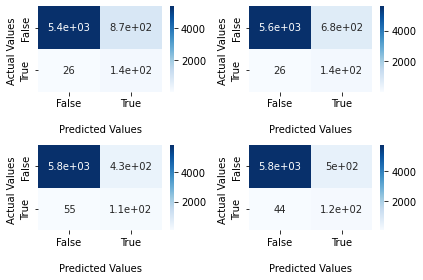

In [55]:
#actl_labels = [eval_label1,eval_label2,eval_label3,eval_label4]
#actl_labels = [eval_label1]
predictions = [prediction1,prediction2,prediction3,prediction4]
all_cf_matrix = []
for i in range(4):

    pyplot.subplot(2,2,i+1)
    cf_matrix = confusion_matrix(eval_label1, predictions[i])
    #cf_matrix = confusion_matrix(actl_labels[i], predictions[i])
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    all_cf_matrix.append(cf_matrix)

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
pyplot.tight_layout()
pyplot.show()

In [56]:
print("Basic Over Sample")
cf_matrix = all_cf_matrix[0]
print(f"False negatives = {cf_matrix[1,0]}, True positive = {cf_matrix[1,1]}")
print(f"Total positives = {sum(cf_matrix[1,:])}, False Negative rate = {cf_matrix[1,0]/sum(cf_matrix[1,:])}")

print("\nSMOTE")
cf_matrix = all_cf_matrix[1]
print(f"False negatives = {cf_matrix[1,0]}, True positive = {cf_matrix[1,1]}")
print(f"Total positives = {sum(cf_matrix[1,:])}, False Negative rate = {cf_matrix[1,0]/sum(cf_matrix[1,:])}")

print("\nBasic Under Sample")
cf_matrix = all_cf_matrix[2]
print(f"False negatives = {cf_matrix[1,0]}, True positive = {cf_matrix[1,1]}")
print(f"Total positives = {sum(cf_matrix[1,:])}, False Negative rate = {cf_matrix[1,0]/sum(cf_matrix[1,:])}")

print("\nSMOTE + Under Sample")
cf_matrix = all_cf_matrix[3]
print(f"False negatives = {cf_matrix[1,0]}, True positive = {cf_matrix[1,1]}")
print(f"Total positives = {sum(cf_matrix[1,:])}, False Negative rate = {cf_matrix[1,0]/sum(cf_matrix[1,:])}")


Basic Over Sample
False negatives = 26, True positive = 139
Total positives = 165, False Negative rate = 0.15757575757575756

SMOTE
False negatives = 26, True positive = 139
Total positives = 165, False Negative rate = 0.15757575757575756

Basic Under Sample
False negatives = 55, True positive = 110
Total positives = 165, False Negative rate = 0.3333333333333333

SMOTE + Under Sample
False negatives = 44, True positive = 121
Total positives = 165, False Negative rate = 0.26666666666666666


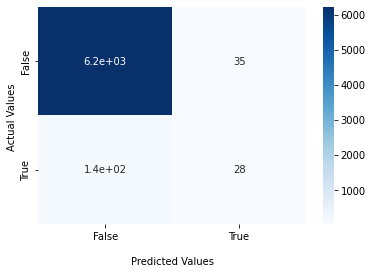

False negatives = 137, True positive = 28
Total positives = 165, False Negative rate = 0.8303030303030303


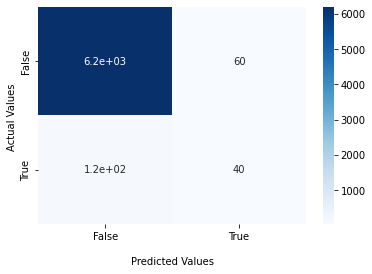

False negatives = 125, True positive = 40
Total positives = 165, False Negative rate = 0.7575757575757576


In [57]:
model5 = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6))
model5.fit(train_data1, train_label1)
prediction5 = model5.predict(eval_data1)
cf_matrix = confusion_matrix(eval_label1, prediction5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
all_cf_matrix.append(cf_matrix)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
pyplot.show()
print(f"False negatives = {cf_matrix[1,0]}, True positive = {cf_matrix[1,1]}")
print(f"Total positives = {sum(cf_matrix[1,:])}, False Negative rate = {cf_matrix[1,0]/sum(cf_matrix[1,:])}")

model6 = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6))
model6.fit(train_data1, train_label1)
prediction6 = model6.predict(eval_data1)
cf_matrix = confusion_matrix(eval_label1, prediction6)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
all_cf_matrix.append(cf_matrix)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
pyplot.show()
print(f"False negatives = {cf_matrix[1,0]}, True positive = {cf_matrix[1,1]}")
print(f"Total positives = {sum(cf_matrix[1,:])}, False Negative rate = {cf_matrix[1,0]/sum(cf_matrix[1,:])}")



In [58]:
print(model1.score(eval_data1,eval_label1))
print(model2.score(eval_data2,eval_label2))
print(model3.score(eval_data3,eval_label3))
print(model4.score(eval_data4,eval_label4))
print(model5.score(eval_data1,eval_label1))
print(model6.score(eval_data1,eval_label1))

0.8598785614198973
0.8750932537567943
0.8306772908366534
0.8444326052210975
0.9732212361824693
0.9711972598474233
